In [3]:
import pandas as pd
import os


#### Task 1: Merge the 12 month data to a single csv 

In [82]:

files = [file for file in os.listdir('./Sales_Data')]

allfiles = pd.DataFrame()

for file in files:
    df = pd.read_csv('./Sales_Data/'+file)
    allfiles = pd.concat([allfiles, df])
    
allfiles.to_csv('allfiles.csv', index = False)

### Clean up the data

In [83]:
# finding NaN Values
nanvalues = allfiles[allfiles.isna().any(axis=1)]
nanvalues.head()
#drops allNaN values
allfiles = allfiles.dropna(how='all')
allfiles.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [84]:
allfiles.columns = allfiles.columns.str.replace(' ','_')
allfiles.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [85]:
allfiles = allfiles.loc[allfiles.Order_Date != 'Order Date']
allfiles.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [97]:
    allfiles['Months'] = pd.DatetimeIndex(allfiles['Order_Date']).month

#### convert columns to the correct data type

In [98]:
allfiles['Quantity_Ordered'] = pd.to_numeric(allfiles['Quantity_Ordered'])
allfiles['Price_Each'] = pd.to_numeric(allfiles['Price_Each'])

#### Read in updated dataframe 

In [99]:
allfiles.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Sales,Months
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4


#### Create month columns 

#### Task3 Add a sales column

In [103]:
allfiles['Sales'] = allfiles.Quantity_Ordered * allfiles.Price_Each
allfiles.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Sales,Months
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4


#### Question 1: What was the best month for sales? How much was earned that month? 

In [105]:
totalmonthlysales = allfiles.groupby('Months').sum()


Text(0, 0.5, 'Sales in USD')

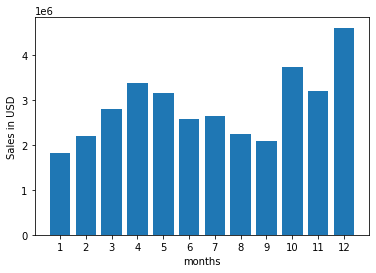

In [106]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months, totalmonthlysales['Sales'])
plt.xticks(months)
plt.xlabel('months')
plt.ylabel('Sales in USD')



#### What US City had the highest Number of Sales

#### Task 4: Get a City Column

In [127]:
#use .apply method
def getcity(address):
    return(address.split(',')[1])

def getstate(address):
    return (address.split(',')[2]).split(' ')[1]

allfiles['City'] = allfiles['Purchase_Address'].apply(lambda x: f'{getcity(x)} ({getstate(x)})')
allfiles.head()




,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Sales,Months,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles (CA)


In [130]:
NumberofSales = allfiles.groupby('City').sum()
NumberofSales

,Quantity_Ordered,Price_Each,Sales,Months
City,,,,
Atlanta (GA),16602,2779908.20,2795498.58,104794
Austin (TX),11153,1809873.61,1819581.75,69829
Boston (MA),22528,3637409.77,3661642.01,141112
Dallas (TX),16730,2752627.82,2767975.40,104620
Los Angeles (CA),33289,5421435.23,5452570.80,208325
New York City (NY),27932,4635370.83,4664317.43,175741
Portland (ME),2750,447189.25,449758.27,17144
Portland (OR),11303,1860558.22,1870732.34,70621
San Francisco (CA),50239,8211461.74,8262203.91,315520


Text(0, 0.5, 'Sales')

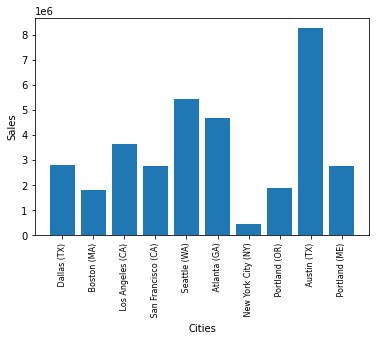

In [143]:
City = allfiles['City'].unique()

plt.bar(City, NumberofSales['Sales'])
plt.xticks(City, rotation = 'vertical',size = 8)
plt.xlabel('Cities')
plt.ylabel('Sales')